In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans


In [96]:
df = pd.read_csv("mall.csv")
features = df.columns.values.tolist()
features.pop(0)
features

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [97]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
CustomerID                0
Gender                    1
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64
------------------------------
Total missing values are: 3
------------------------------


In [98]:

numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000000,15.000000,39
1,2,Male,21.000000,15.000000,81
2,3,Female,20.000000,16.000000,6
3,4,Female,23.000000,16.000000,77
4,5,Female,31.000000,17.000000,40
...,...,...,...,...,...
198,199,Male,32.000000,137.000000,18
199,200,Male,30.000000,137.000000,83
200,201,Female,27.000000,61.316832,28
201,202,Male,38.747525,137.000000,19


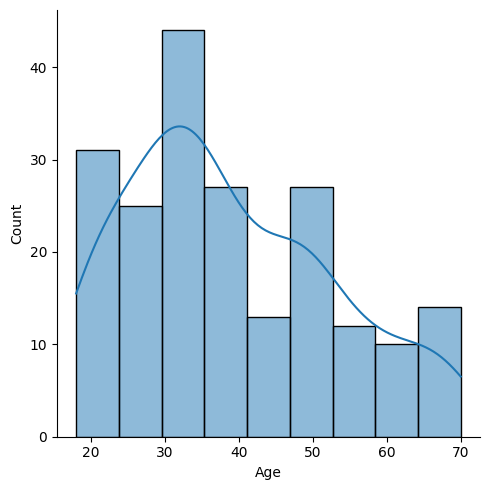

In [99]:
sns.displot(df,x='Age',kde='True')

In [100]:
df.loc[(df.Gender == 'Female'), 'Gender'] = 0
df.loc[(df.Gender == 'Male'), 'Gender'] = 1
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.000000,15.000000,39
1,2,1,21.000000,15.000000,81
2,3,0,20.000000,16.000000,6
3,4,0,23.000000,16.000000,77
4,5,0,31.000000,17.000000,40
...,...,...,...,...,...
198,199,1,32.000000,137.000000,18
199,200,1,30.000000,137.000000,83
200,201,0,27.000000,61.316832,28
201,202,1,38.747525,137.000000,19


In [109]:
corr = df.corr()
c = corr['Spending Score (1-100)'].abs().sort_values(ascending=False)
c.index[1]

'Age'

In [116]:
df['Annual Income (k$)'].mean()

61.31683168316832

In [117]:
df.loc[(df.Gender==1),'Spending Score (1-100)'].mean()

48.17977528089887

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

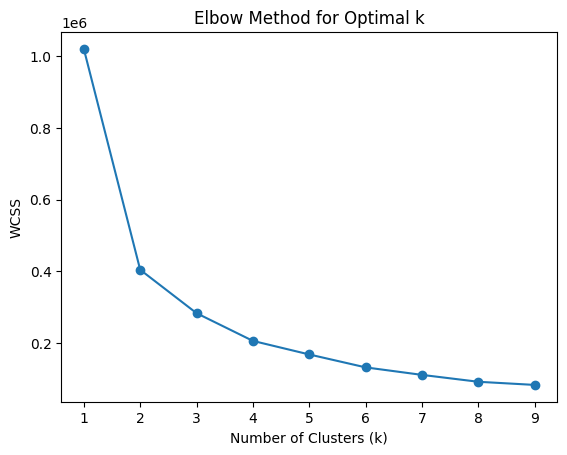

In [158]:
wcss = []
for k in range(1, 10):  # Try different values of k (e.g., 1 to 4)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow curve
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [165]:
cluster = KMeans(n_clusters=5, max_iter=50)
cluster.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

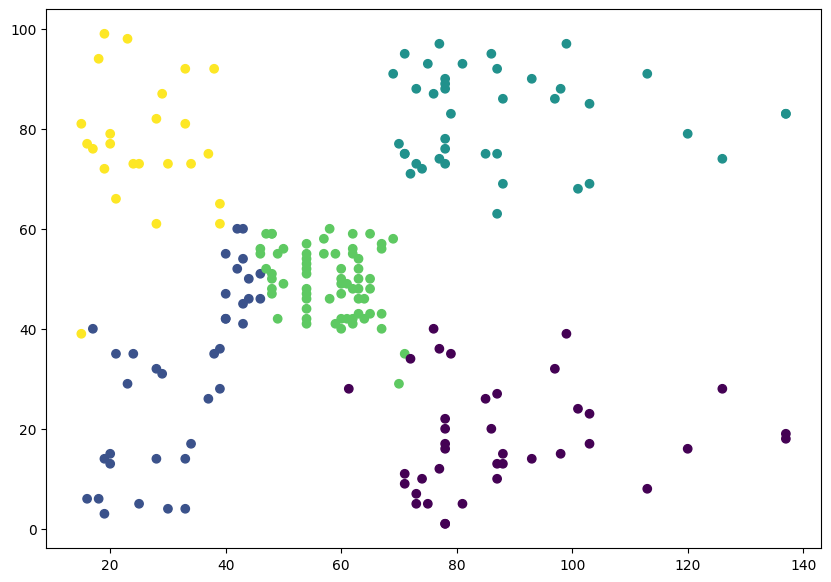

In [166]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster.labels_)

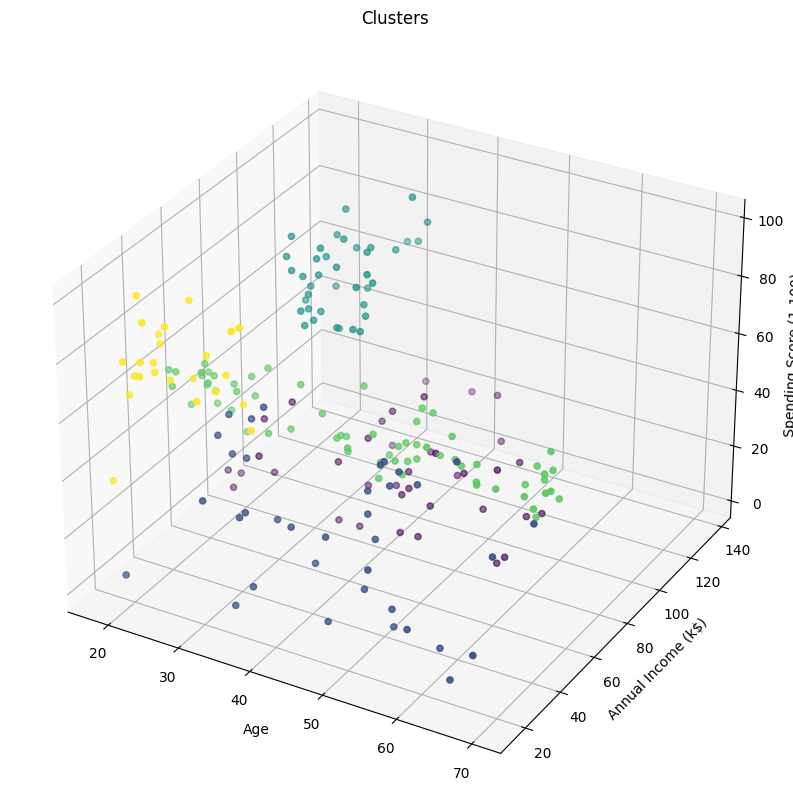

In [167]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection ="3d")

ax.scatter3D(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster.labels_)
plt.title("Clusters")

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [168]:
cluster_labels = cluster.labels_

cluster_sizes = np.bincount(cluster_labels)

total_customers = len(df)


percentages = (cluster_sizes / total_customers) * 100

for i, percentage in enumerate(percentages):
    print(f"Cluster {i}: {percentage:.2f}%")


Cluster 0: 18.72%
Cluster 1: 17.73%
Cluster 2: 19.70%
Cluster 3: 32.02%
Cluster 4: 11.82%


In [169]:
cluster_2_ages = df[cluster_labels == 1]['Age']
most_frequent_age = cluster_2_ages.mode().values[0]
print(f"Most frequent age in Cluster 2: {most_frequent_age} years")

Most frequent age in Cluster 2: 31.0 years


In [170]:
cluster_3_income = df[cluster_labels == 2]['Annual Income (k$)']
average_income = cluster_3_income.mean()
print(f"Average Income in Cluster 2: {average_income} k$")

Average Income in Cluster 2: 87.8 k$


In [172]:
cluster_labels = cluster.labels_

df['Cluster'] = cluster_labels

for cluster_id in range(cluster.n_clusters):
    cluster_customers = df[df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id} (Size: {len(cluster_customers)}):")
    print(cluster_customers[['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])  # Adjust columns as needed
    print("\n")

Cluster 0 (Size: 38):
     CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
128         129  59.000000           71.000000                      11
130         131  47.000000           71.000000                       9
132         133  25.000000           72.000000                      34
134         135  20.000000           73.000000                       5
136         137  44.000000           73.000000                       7
138         139  19.000000           74.000000                      10
140         141  57.000000           75.000000                       5
142         143  28.000000           76.000000                      40
144         145  25.000000           77.000000                      12
146         147  48.000000           77.000000                      36
148         149  34.000000           78.000000                      22
150         151  43.000000           78.000000                      17
152         153  44.000000           78.000000         